# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


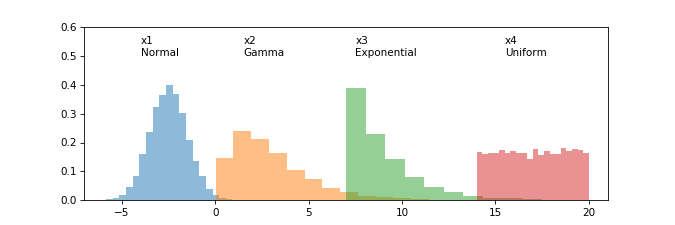

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(15.5241,0.5,'x4\nUniform')

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


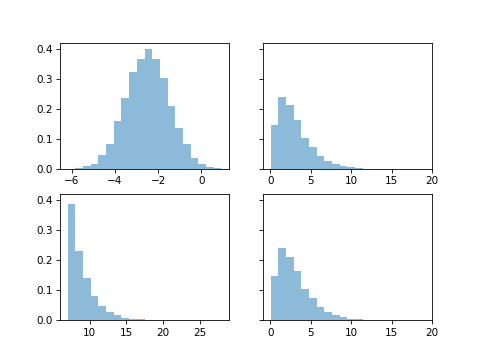

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [2]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)

ax1.hist(x1, normed=True, bins=20, alpha=0.5);
ax2.hist(x2, normed=True, bins=20, alpha=0.5);
ax3.hist(x3, normed=True, bins=20, alpha=0.5);
ax4.hist(x2, normed=True, bins=20, alpha=0.5);

In [3]:
n = 1000

def update_fig(curr):
    current_frame = (curr*10)+100
    if current_frame  == n:
        # exit update and keep current plot
        a.event_source.stop()
        return
        
    plt.clf()
    
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,2,3)
    ax4 = plt.subplot(2,2,4)
    
    #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
    #plt.subplots(2, 2, sharey=True)
    
    #plt.hist(x1[:current_frame], normed=True)
    ax1.hist(x1[:current_frame], density=True, bins=20)
    ax2.hist(x2[:current_frame], density=True, bins=20)
    ax3.hist(x3[:current_frame], density=True, bins=20)
    ax4.hist(x4[:current_frame], density=True, bins=20)
    
    ax1.axis([-7,1,0,0.5])
    ax2.axis([-1,15,0,0.5])
    ax3.axis([5,20,0,0.5])
    ax4.axis([13,21,0,0.35])
    plt.annotate('n = {}'.format(current_frame), [0,0.4])
    

<IPython.core.display.Javascript object>


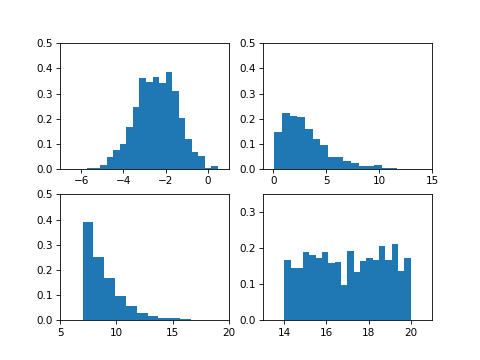

In [4]:
import matplotlib.animation as animation

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
fig = plt.figure()
a= animation.FuncAnimation(fig, update_fig, interval=100)